In [109]:
import pandas as pd 
import numpy as np 

In [110]:
df = pd.read_csv('D:\\1-Data Science\\6 - Machine Learning\\Random Forest\\Data\\HR_DT.csv')

In [111]:
df

,Position of the employee,no of Years of Experience of employee,monthly income of employee
0,Business Analyst,1.1,39343
1,Junior Consultant,1.3,46205
2,Senior Consultant,1.5,37731
3,Manager,2.0,43525
4,Country Manager,2.2,39891
...,...,...,...
191,Region Manager,3.9,55794
192,Partner,4.0,56957
193,Senior Partner,4.0,57081
194,C-level,4.1,61111


In [112]:
df.columns


Index(['Position of the employee', 'no of Years of Experience of employee',
       ' monthly income of employee'],
      dtype='object')

In [113]:
df.rename(columns={' monthly income of employee': "monthly income of employee"}, inplace=True)

In [114]:
df.columns

Index(['Position of the employee', 'no of Years of Experience of employee',
       'monthly income of employee'],
      dtype='object')

In [115]:
input = df.drop('monthly income of employee', axis = 'columns')
target = df['monthly income of employee']

In [116]:
from sklearn.preprocessing import LabelEncoder

In [117]:
position = LabelEncoder()

In [118]:
input['position'] = position.fit_transform(df["Position of the employee"])

In [119]:
input_n = input.drop('Position of the employee', axis = 'columns')
input_n

,no of Years of Experience of employee,position
0,1.1,0
1,1.3,4
2,1.5,8
3,2.0,5
4,2.2,3
...,...,...
191,3.9,7
192,4.0,6
193,4.0,9
194,4.1,1


In [143]:
def norm(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [144]:
input_n['experience'] = norm(input['no of Years of Experience of employee'])

In [145]:
# from sklearn.preprocessing import MinMaxScaler

In [146]:
# md = MinMaxScaler()
# md.fit_transform(input['no of Years of Experience of employee'])

In [147]:
input_n = input_n.drop('no of Years of Experience of employee', axis = 'columns')
input_n

KeyError: "['no of Years of Experience of employee'] not found in axis"

In [ ]:
target

0      39343
1      46205
2      37731
3      43525
4      39891
       ...  
191    55794
192    56957
193    57081
194    61111
195    67938
Name: monthly income of employee, Length: 196, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(input_n, target, test_size= 0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators = 20)

In [148]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [149]:
model.score(X_test, y_test)

0.525

In [150]:
pred = model.predict(X_test)
pred

array([122391,  81363,  57189,  37731,  56957,  66029,  63218,  46205,
       122391,  60150, 113812,  39891,  98273,  39891,  98273,  54445,
        37731,  57189,  39343, 113812,  43525, 121872, 122391,  57081,
       113812,  93940, 121872, 121872,  39343, 113812, 122391, 113812,
        60150, 113812,  37731,  60150, 105582, 109431,  63218,  83088],
      dtype=int64)

In [151]:
from sklearn.metrics import confusion_matrix

In [152]:
cm = confusion_matrix(pred, y_test)

In [153]:
cm

array([[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 

In [154]:
import matplotlib.pyplot as plt 
import seaborn as sns


Text(45.722222222222214, 0.5, 'Truth')

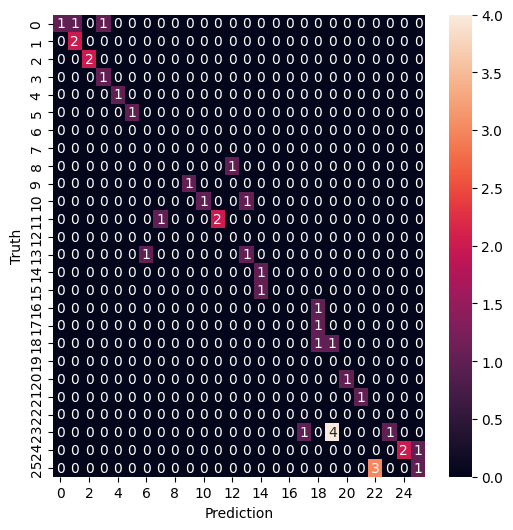

In [155]:
plt.figure(figsize = (6,6))
sns.heatmap(cm, annot=True)
plt.xlabel('Prediction')
plt.ylabel("Truth")